In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
try:
    import seaborn as sns
except ImportError:
    pass

%matplotlib inline

## Reading in the enriched survey data set

<div class="alert alert-success">
    <b>EXERCISE</b>: Read in the 'survey_data_completed.csv' file and save the resulting DataFrame as variable `survey_data`. Interpret the 'eventDate' column directly as python datetime object and make sure the 'occurrenceID' column is used as the index of the resulting DataFrame
</div>

In [24]:
survey_data = pd.read_csv("../data/survey_data_completed.csv", 
                          parse_dates=['eventDate'], index_col="occurrenceID")

In [25]:
survey_data.head()

,verbatimSex,datasetName,sex,eventDate,measurementOrFact,decimalLongitude,decimalLatitude,verbatimLocality,genus,species,taxa,name,class,kingdom,order,phylum,scientificName,status,usageKey
occurrenceID,,,,,,,,,,,,,,,,,,,
1,M,Ecological Archives E090-118-D1.,male,1977-07-16,NaN,-109.081975,31.938887,"{""plot"": 2}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M,Ecological Archives E090-118-D1.,male,1977-07-16,NaN,-109.081208,31.938896,"{""plot"": 3}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F,Ecological Archives E090-118-D1.,female,1977-07-16,NaN,-109.081975,31.938887,"{""plot"": 2}",Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
4,M,Ecological Archives E090-118-D1.,male,1977-07-16,NaN,-109.082816,31.938113,"{""plot"": 7}",Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
5,M,Ecological Archives E090-118-D1.,male,1977-07-16,NaN,-109.081208,31.938896,"{""plot"": 3}",Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0


In [26]:
survey_data["eventDate"].dtype

dtype('<M8[ns]')

In [27]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35550 entries, 1 to 35550
Data columns (total 19 columns):
verbatimSex          33042 non-null object
datasetName          35550 non-null object
sex                  33041 non-null object
eventDate            35550 non-null datetime64[ns]
measurementOrFact    32283 non-null object
decimalLongitude     35550 non-null float64
decimalLatitude      35550 non-null float64
verbatimLocality     35550 non-null object
genus                33535 non-null object
species              33535 non-null object
taxa                 33535 non-null object
name                 33535 non-null object
class                33447 non-null object
kingdom              33447 non-null object
order                33447 non-null object
phylum               33447 non-null object
scientificName       33447 non-null object
status               33447 non-null object
usageKey             33447 non-null float64
dtypes: datetime64[ns](1), float64(3), object(15)
memory usage:

## Tackle Nan and duplicate values

<div class="alert alert-success">
    <b>EXERCISE</b>: How many records are in the data set without information on the 'species' name?
</div>

In [28]:
sum(survey_data['species'].isnull())

2015

<div class="alert alert-success">
    <b>EXERCISE</b>: How many duplicate records are present in the dataset?
</div>

In [29]:
sum(survey_data.duplicated())

1577

<div class="alert alert-success">
    <b>EXERCISE</b>: Extract a list of all duplicates (check documentation of `duplicated`!), sort on the columns `eventDate` and `verbatimLocality` and show the first 10 records
</div>

In [30]:
survey_data[survey_data.duplicated(keep=False)].sort_values(["eventDate", "verbatimLocality"]).head(10)

,verbatimSex,datasetName,sex,eventDate,measurementOrFact,decimalLongitude,decimalLatitude,verbatimLocality,genus,species,taxa,name,class,kingdom,order,phylum,scientificName,status,usageKey
occurrenceID,,,,,,,,,,,,,,,,,,,
5,M,Ecological Archives E090-118-D1.,male,1977-07-16,NaN,-109.081208,31.938896,"{""plot"": 3}",Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
14,M,Ecological Archives E090-118-D1.,male,1977-07-16,NaN,-109.081208,31.938896,"{""plot"": 3}",Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
4,M,Ecological Archives E090-118-D1.,male,1977-07-16,NaN,-109.082816,31.938113,"{""plot"": 7}",Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
13,M,Ecological Archives E090-118-D1.,male,1977-07-16,NaN,-109.082816,31.938113,"{""plot"": 7}",Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
34,F,Ecological Archives E090-118-D1.,female,1977-07-17,NaN,-109.079307,31.938056,"{""plot"": 11}",Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
38,F,Ecological Archives E090-118-D1.,female,1977-07-17,NaN,-109.079307,31.938056,"{""plot"": 11}",Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
40,F,Ecological Archives E090-118-D1.,female,1977-07-17,NaN,-109.079307,31.938056,"{""plot"": 11}",Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
27,M,Ecological Archives E090-118-D1.,male,1977-07-17,NaN,-109.081036,31.937059,"{""plot"": 15}",Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
28,M,Ecological Archives E090-118-D1.,male,1977-07-17,NaN,-109.081036,31.937059,"{""plot"": 15}",Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0


<div class="alert alert-success">
        <b>EXERCISE</b>: Exclude the duplicate values from the survey data set and save the result as `survey_data_unique`
</div>

In [31]:
survey_data_unique = survey_data.drop_duplicates()

In [32]:
len(survey_data_unique)

33973

<div class="alert alert-success">
    <b>EXERCISE</b>: For how many records we have all the information available (i.e. no Nan values in any of the columns)?
</div>

In [33]:
len(survey_data_unique.dropna())

29777

<div class="alert alert-success">
    <b>EXERCISE</b>: Select the subset of records without a species name, while having information on the sex and store the result as variable `not_identified`
</div>

In [34]:
not_identified = survey_data_unique[survey_data_unique['species'].isnull() & survey_data_unique['sex'].notnull()]

In [35]:
not_identified.head()

,verbatimSex,datasetName,sex,eventDate,measurementOrFact,decimalLongitude,decimalLatitude,verbatimLocality,genus,species,taxa,name,class,kingdom,order,phylum,scientificName,status,usageKey
occurrenceID,,,,,,,,,,,,,,,,,,,
1,M,Ecological Archives E090-118-D1.,male,1977-07-16,NaN,-109.081975,31.938887,"{""plot"": 2}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M,Ecological Archives E090-118-D1.,male,1977-07-16,NaN,-109.081208,31.938896,"{""plot"": 3}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,F,Ecological Archives E090-118-D1.,female,1977-07-17,NaN,-109.081036,31.937059,"{""plot"": 15}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,M,Ecological Archives E090-118-D1.,male,1977-07-17,NaN,-109.079415,31.937117,"{""plot"": 17}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,M,Ecological Archives E090-118-D1.,male,1977-08-19,NaN,-109.081975,31.938887,"{""plot"": 2}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-success">
    <b>EXERCISE</b>: Select only those records that do have species information and save them as the variable `survey_data_present`. Make sure `survey_data_present` is a copy of the original DataFrame
</div>

In [36]:
survey_data_present = survey_data_unique[survey_data_unique['species'].notnull()].copy()

<div class="alert alert-danger">
    <b>NOTE</b>: For biodiversity studies, absence values (knowing that someting is not present) are useful as well to normalize the observations, but this is out of scope for these exercises.
</div>

## Extract information from json string

In [37]:
survey_data_present.head()

,verbatimSex,datasetName,sex,eventDate,measurementOrFact,decimalLongitude,decimalLatitude,verbatimLocality,genus,species,taxa,name,class,kingdom,order,phylum,scientificName,status,usageKey
occurrenceID,,,,,,,,,,,,,,,,,,,
3,F,Ecological Archives E090-118-D1.,female,1977-07-16,NaN,-109.081975,31.938887,"{""plot"": 2}",Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
4,M,Ecological Archives E090-118-D1.,male,1977-07-16,NaN,-109.082816,31.938113,"{""plot"": 7}",Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
5,M,Ecological Archives E090-118-D1.,male,1977-07-16,NaN,-109.081208,31.938896,"{""plot"": 3}",Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0
6,M,Ecological Archives E090-118-D1.,male,1977-07-16,NaN,-109.082829,31.938851,"{""plot"": 1}",Perognathus,flavus,Rodent,Perognathus flavus,Mammalia,Animalia,Rodentia,Chordata,"Perognathus flavus Baird, 1855",ACCEPTED,2439566.0
7,F,Ecological Archives E090-118-D1.,female,1977-07-16,NaN,-109.081975,31.938887,"{""plot"": 2}",Peromyscus,eremicus,Rodent,Peromyscus eremicus,Mammalia,Animalia,Rodentia,Chordata,"Peromyscus eremicus (Baird, 1857)",ACCEPTED,2437981.0


**Intermezzo:** example to interpret a json string as a dictionary

In [38]:
import json

In [39]:
json.loads('{"plot": 2}')

{'plot': 2}

<div class="alert alert-success">
    <b>EXERCISE</b>: Extract the plot numbers itself from the `verbatimLocality` column and save it in a new column `plot_id`
</div>

In [40]:
survey_data_present["plot_id"] = survey_data_present["verbatimLocality"].apply(lambda x: json.loads(x)["plot"])

In [41]:
survey_data_present.head()

,verbatimSex,datasetName,sex,eventDate,measurementOrFact,decimalLongitude,decimalLatitude,verbatimLocality,genus,species,taxa,name,class,kingdom,order,phylum,scientificName,status,usageKey,plot_id
occurrenceID,,,,,,,,,,,,,,,,,,,,
3,F,Ecological Archives E090-118-D1.,female,1977-07-16,NaN,-109.081975,31.938887,"{""plot"": 2}",Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0,2
4,M,Ecological Archives E090-118-D1.,male,1977-07-16,NaN,-109.082816,31.938113,"{""plot"": 7}",Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0,7
5,M,Ecological Archives E090-118-D1.,male,1977-07-16,NaN,-109.081208,31.938896,"{""plot"": 3}",Dipodomys,merriami,Rodent,Dipodomys merriami,Mammalia,Animalia,Rodentia,Chordata,"Dipodomys merriami Mearns, 1890",ACCEPTED,2439521.0,3
6,M,Ecological Archives E090-118-D1.,male,1977-07-16,NaN,-109.082829,31.938851,"{""plot"": 1}",Perognathus,flavus,Rodent,Perognathus flavus,Mammalia,Animalia,Rodentia,Chordata,"Perognathus flavus Baird, 1855",ACCEPTED,2439566.0,1
7,F,Ecological Archives E090-118-D1.,female,1977-07-16,NaN,-109.081975,31.938887,"{""plot"": 2}",Peromyscus,eremicus,Rodent,Peromyscus eremicus,Mammalia,Animalia,Rodentia,Chordata,"Peromyscus eremicus (Baird, 1857)",ACCEPTED,2437981.0,2


## Observations over time

To evaluate the intensity or number of occurrences during different time spans, a heatmap is an interesting representation. This functionality is provided by the plotting library [seaborn](http://seaborn.pydata.org/generated/seaborn.heatmap.html). Let's reformat this data to plot is as a heatmap:

<div class="alert alert-success">
    <b>EXERCISE</b>: Create a table, called `heatmap_prep`, based on `survey_data_decoupled` DataFrame with in the row index the years, in the column the months and as values of the table, the counts for each of these year/month combinations.
</div>

In [ ]:
heatmap_prep = survey_data_present.pivot_table(index="year", columns="month", 
                                                 values="occurrenceID", aggfunc='count')

In [ ]:
fig, ax = plt.subplots()
ax = sns.heatmap(heatmap_prep)

<div class="alert alert-success">
    <b>EXERCISE</b>: Make a heatmap of the number of records with the days (1 -> 31) in the rows and the months (1 -> 12) in the columns:
</div>

In [ ]:
heatmap_prep = survey_data_present.pivot_table(index="day", columns="month", 
                                                 values="occurrenceID", aggfunc='count')
fig, ax = plt.subplots()
ax = sns.heatmap(heatmap_prep)

## Species abundance for each of the plots

<div class="alert alert-success">
    <b>EXERCISE</b>: Which 8 species have been observed most of all?
</div>

In [42]:
survey_data_present.groupby("species").size().nlargest(8)

species
merriami        10025
ordii            2966
penicillatus     2928
baileyi          2696
megalotis        2485
spectabilis      2481
torridus         2220
flavus           1475
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: How many records are available of each the species in each of the plots? How would you visualize this information?
</div>

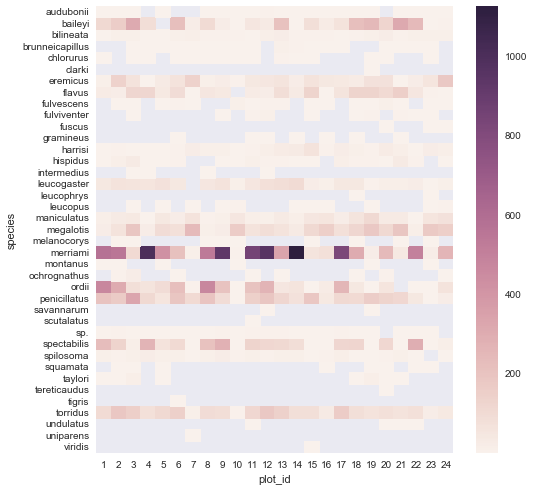

In [43]:
species_per_plot = survey_data_present.reset_index().pivot_table(index="species", 
                                                                 columns="plot_id", 
                                                                 values="occurrenceID", 
                                                                 aggfunc='count')
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(species_per_plot, ax=ax)

<div class="alert alert-success">
    <b>EXERCISE</b>: What is the number of different species in each of the plots? Make a bar chart providing for each plot the diversity of species, by defining a matplotlib figure and ax to make the plot. Change the y-label to 'plot number'
</div>

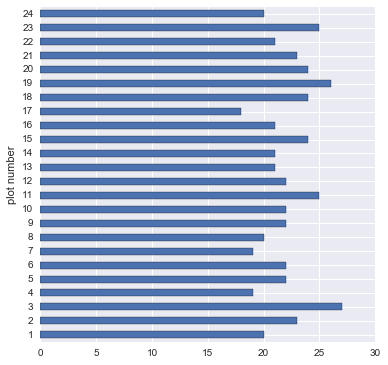

In [44]:
# inspired on the pivot table we already had:
fig, ax = plt.subplots(figsize=(6, 6))
survey_data_present.reset_index().pivot_table(index="species", columns="plot_id", values="occurrenceID", aggfunc='count').count().plot(kind="barh", ax=ax)
ax.set_ylabel("plot number")

# Alternative option:
# survey_data_present.groupby(["plot_id"])["species"].agg(lambda x: len(pd.unique(x)))

<div class="alert alert-success">
    <b>EXERCISE</b>: What is the number of plots each species have been observed? Make a bar chart providing for each species the spread amongst the plots for which the species names are sorted to the number of plots
</div>

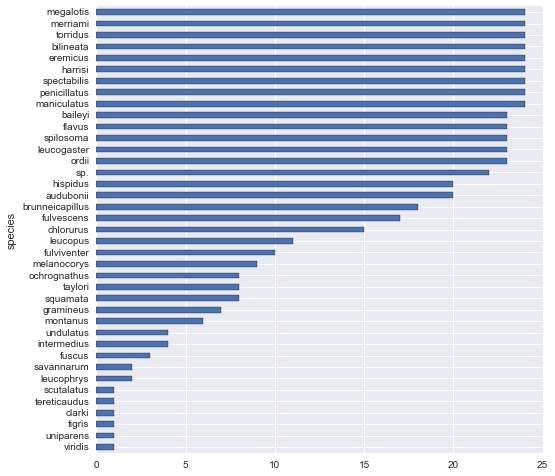

In [45]:
fig, ax = plt.subplots(figsize=(8, 8))
survey_data_present.reset_index().pivot_table(index="plot_id", columns="species", values="occurrenceID", aggfunc='count').count().sort_values().plot(kind="barh", ax=ax)

#survey_data_present.groupby(["species"])["plot_id"].agg(lambda x: len(pd.unique(x)))

<div class="alert alert-success">
    <b>EXERCISE</b>: Evaluate the amount of males and females present in each of the plots. Make sure to exclude Nan-values
</div>

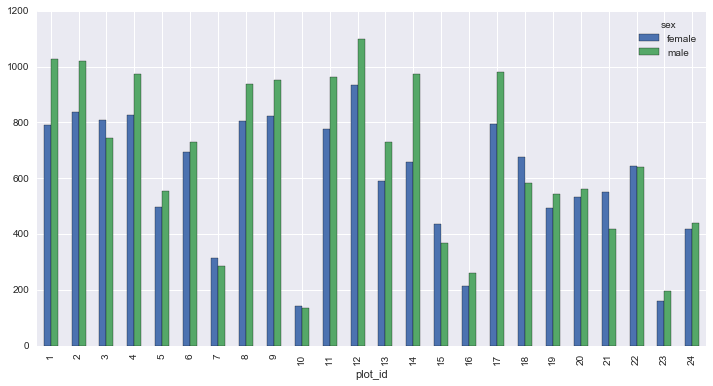

In [46]:
subselection_sex = survey_data_present[survey_data_present["sex"].notnull()]
ax = subselection_sex.groupby(["sex", "plot_id"]).size().unstack().transpose().plot(kind='bar', figsize=(12, 6))
#for label in ax.get_xticklabels():
#    label.set_rotation(0)

## Select subsets according to taxa of species

In [47]:
survey_data_present["taxa"].unique()

array(['Rodent', 'Rodent-not censused', 'Rabbit', 'Bird', 'Reptile'], dtype=object)

In [48]:
survey_data_present.groupby('taxa').size()

taxa
Bird                     354
Rabbit                    59
Reptile                   14
Rodent                 30939
Rodent-not censused      595
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Select the records for which the `taxa` is equal to 'Rabbit', 'Bird' or 'Reptile'. Call the resulting variable `non_rodent_species`.
</div>

In [49]:
non_rodent_species = survey_data_present[survey_data_present['taxa'].isin(['Rabbit', 'Bird', 'Reptile'])]

In [50]:
len(non_rodent_species)

427

<div class="alert alert-success">
    <b>EXERCISE</b>: Select the records for which the `taxa` starts with an 'ro' (make sure it does not matter if a capital is used as 'taxa' name). Call the resulting variable `r_species`.
</div>

In [51]:
r_species = survey_data_present[survey_data_present['taxa'].str.lower().str.startswith('ro')]

In [52]:
len(r_species)

31534

<div class="alert alert-success">
    <b>EXERCISE</b>: Select the records that are not Birds. Call the resulting variable `non_bird_species`.
</div>

In [53]:
non_bird_species = survey_data_present[survey_data_present['taxa'] != 'Bird']

In [54]:
len(non_bird_species)

31607

## Evolution of species during monitoring period

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of records for `merriami` on yearly basis during time
</div>

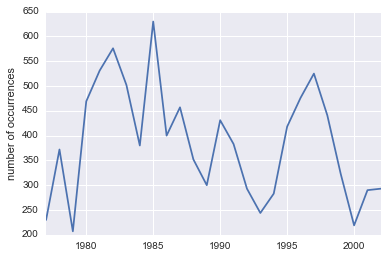

In [55]:
merriami = survey_data_present[survey_data_present["species"] == "merriami"]
fig, ax = plt.subplots()
merriami.groupby(merriami['eventDate'].dt.year).size().plot(ax=ax)
ax.set_xlabel("")
ax.set_ylabel("number of occurrences")

<div class="alert alert-danger">
    <b>NOTE</b>: Check the difference between the following two graphs? What is different? Which one would you use?
</div>

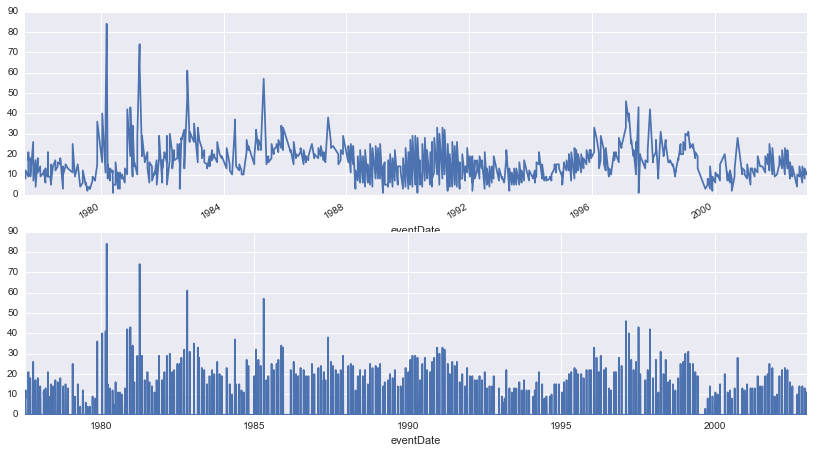

In [56]:
merriami = survey_data_present[survey_data_present["species"] == "merriami"]
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
merriami.groupby(merriami['eventDate']).size().plot(ax=ax[0], style="-") # top graph
merriami.set_index("eventDate").resample("D").size().plot(ax=ax[1], style="-") # lower graph

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot, for the species 'merriami', 'ordii', 'megalotis' and 'baileyi', the monthly number of records as a function of time for the whole monitoring period. Plot each of the individual species in a separate subplot and provide them all with the same y-axis scale (cfr. documentation pandas plot function).
</div>

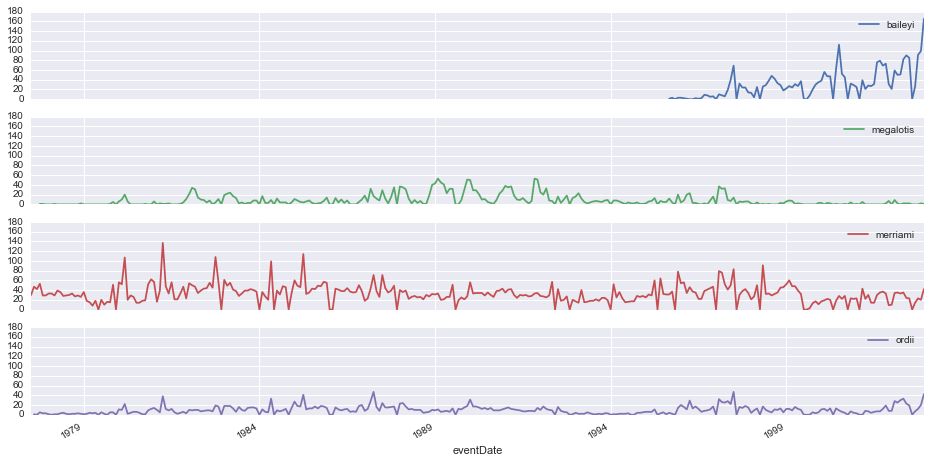

In [57]:
subsetspecies = survey_data_present[survey_data_present["species"].isin(['merriami', 'ordii', 
                                                                         'megalotis', 'baileyi'])]
month_evolution = subsetspecies.set_index("eventDate").groupby("species").resample('M').size()
species_evolution = month_evolution.unstack().transpose()
axs = species_evolution.plot(subplots=True, figsize=(16, 8), sharey=True)

<div class="alert alert-success">
    <b>EXERCISE</b>: Evaluate the yearly amount of occurrences for each of the 'taxa' as a function of time.
</div>

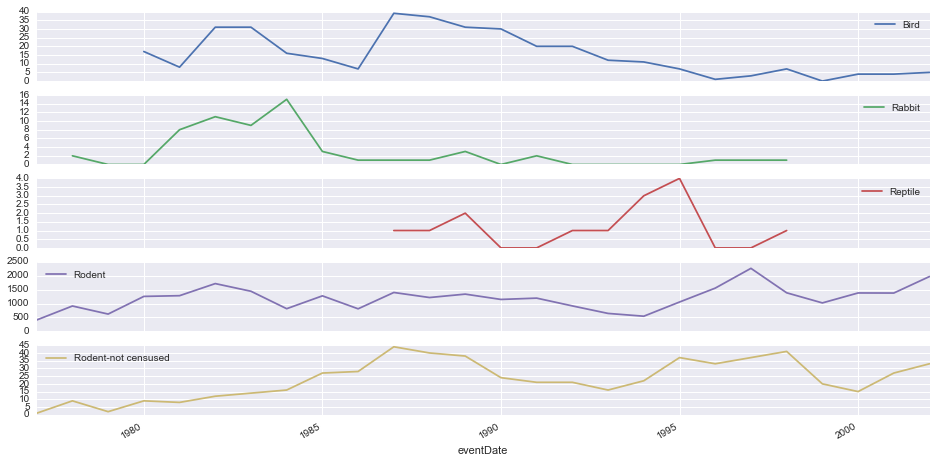

In [58]:
year_evolution = survey_data_present.set_index("eventDate").groupby("taxa").resample('A').size()
species_evolution = year_evolution.unstack().transpose()
axs = species_evolution.plot(subplots=True, figsize=(16, 8), sharey=False)

<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate the number of occurrences for each weekday, grouped by each year of the monitoring campaign, without using the `pivot` functionality. Call the variable `count_weekday_years`
</div>

In [40]:
count_weekday_years = survey_data_present.groupby([survey_data_present["eventDate"].dt.year, survey_data_present["eventDate"].dt.dayofweek]).size().unstack()

In [47]:
count_weekday_years.head()

eventDate,0,1,2,3,4,5,6
eventDate,,,,,,,
1977,89.0,35.0,NaN,NaN,19.0,106.0,160.0
1978,121.0,14.0,16.0,71.0,148.0,277.0,275.0
1979,39.0,79.0,121.0,58.0,NaN,165.0,161.0
1980,234.0,162.0,94.0,62.0,81.0,160.0,489.0
1981,446.0,63.0,87.0,126.0,74.0,83.0,427.0


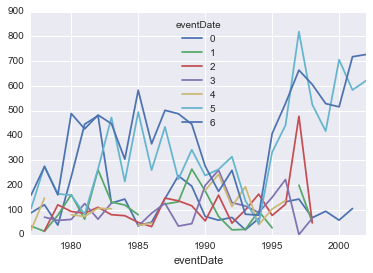

In [52]:
count_weekday_years.plot()

<div class="alert alert-success">
    <b>EXERCISE</b>: Based on the variable `count_weekday_years`, calculate for each weekday the median amount of records based on the yearly count values
</div>

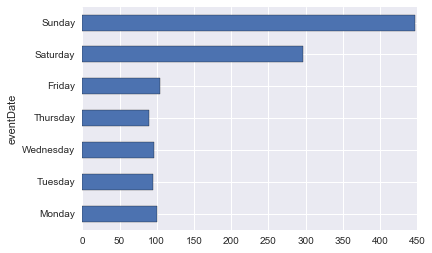

In [51]:
fig, ax = plt.subplots()
count_weekday_years.median(axis=0).plot(kind='barh', ax=ax)
xticks = ax.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', "Thursday", "Friday", "Saturday", "Sunday"])

Andere ideeën: